In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400.0,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848.0,2,6,2,1,0


In [3]:
# Seperating the dependent and independent variables
x = df.drop(['trip_duration'] , axis = 1)
y = df['trip_duration']
x.shape , y.shape

((729287, 11), (729287,))

In [4]:
# Scaling our data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [5]:
x = pd.DataFrame(x_scaled , columns = x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.931525,-0.504511,0.280923,0.832137,0.137202,0.538016,-1.560050,0.372987,-0.903481,0.074617,-0.074617
1,-1.073508,0.257461,-0.212147,-0.570858,-0.306501,-1.577473,0.486556,1.466272,-0.308476,0.074617,-0.074617
2,0.931525,0.257461,-0.341211,-0.877008,0.364919,0.642181,1.509859,0.529170,-0.903481,0.074617,-0.074617
3,0.931525,3.305345,0.169797,0.261968,0.239165,0.800652,-1.048398,-0.720298,-1.498486,0.074617,-0.074617
4,-1.073508,-0.504511,-0.625153,-1.263669,-0.212103,-0.309281,-0.536747,-1.188849,-0.903481,0.074617,-0.074617


In [6]:
# forming the train and test data from our dataset

from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y , random_state = 100)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [8]:
lr = LinearRegression()
lr.fit(train_x , train_y)

LinearRegression()

In [9]:
#predicting over the test_data

test_pred = lr.predict(test_x)
k = np.sqrt(mse(test_pred , test_y))
print('RMSE of model is: ' , k)

RMSE of model is:  592.1139123723932


# Regularizing the data

Lasso Regression

In [10]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 0.0001, normalize = True , max_iter = 1000 , tol = 0.00001)
lasso_reg.fit(train_x , train_y)

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.0001, normalize=True, tol=1e-05)

In [11]:
# These are the best parameters of lasso model

In [12]:
train_pred = lasso_reg.predict(train_x)
mean_train_error = np.sqrt(mse(train_pred , train_y))
print('RMSE of lasso model of train data : ' , mean_train_error)

RMSE of lasso model of train data :  599.9706327803192


In [13]:
test_pred = lasso_reg.predict(test_x)
mean_test_error = np.sqrt(mse(test_pred , test_y))
print('RMSE of lasso model on test data :' , mean_test_error)

RMSE of lasso model on test data : 592.1100324545318


Ridge Regression 

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.01 , normalize = True , max_iter = 1000 , tol = 0.00001)
ridge_reg.fit(train_x , train_y)

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.01, max_iter=1000, normalize=True, tol=1e-05)

In [18]:
# These are the best hyperparameters of ridge regression.

In [19]:
train_pred = ridge_reg.predict(train_x)
mean_train_error = np.sqrt(mse(train_pred , train_y))
print('RMSE of ridge model of train data :' ,mean_train_error)

RMSE of ridge model of train data : 599.9793776344706


In [20]:
test_pred = ridge_reg.predict(test_x)
mean_test_error = np.sqrt(mse(test_pred , test_y))
print('RMSE of ridge model of test data' , mean_test_error)

RMSE of ridge model of test data 592.2388444739155


Let us check for parameters of Linear Regression:


In [21]:
lr.coef_

array([ 6.56002819e+00,  8.62956525e+00,  1.41864623e+02, -8.16710074e+01,
       -3.52234433e+01, -7.04600442e+01, -2.09989187e+01,  1.74536100e+01,
        3.68528371e+01,  2.78355685e+14,  2.78355685e+14])

In [24]:
# Arranging and calculating the residuals

residuals = pd.DataFrame({
    'fitted values': test_y,
    'predicted values': test_pred
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.shape

(182322, 3)

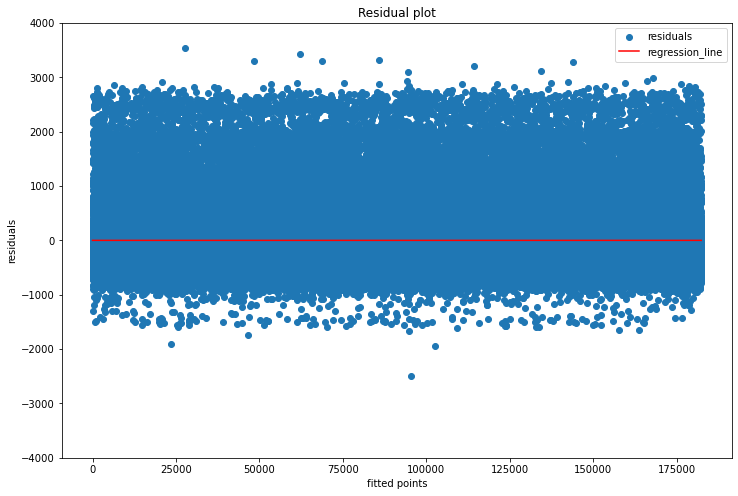

In [25]:
# plotting the residuals curve and checking for constant variance

plt.figure(figsize = (12,8))
f = range(0,182322)
k = [0 for i in range(0 , 182322)]
plt.scatter(f , residuals.residuals[:] , label = 'residuals')
plt.plot(f,k,color = 'r' , label = 'regression_line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000 , 4000)
plt.legend()

In [27]:
# There is no pattern or variance in the dataset. The Dataset is nearly constant.

Text(0.5, 1.0, 'Distribution of error terms')

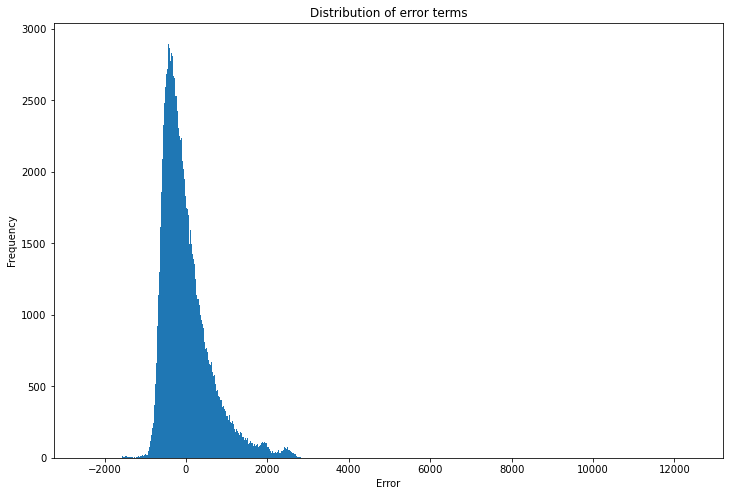

In [28]:
# Checking the distributions of residuals

plt.figure(figsize = (12,8))
plt.hist(residuals.residuals , bins = 1000)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of error terms')

In [29]:
# Most of our data is entered around 0, there are some large values but not too high though.

Text(0.5, 1.0, 'Checking distributions of Residual Errors')

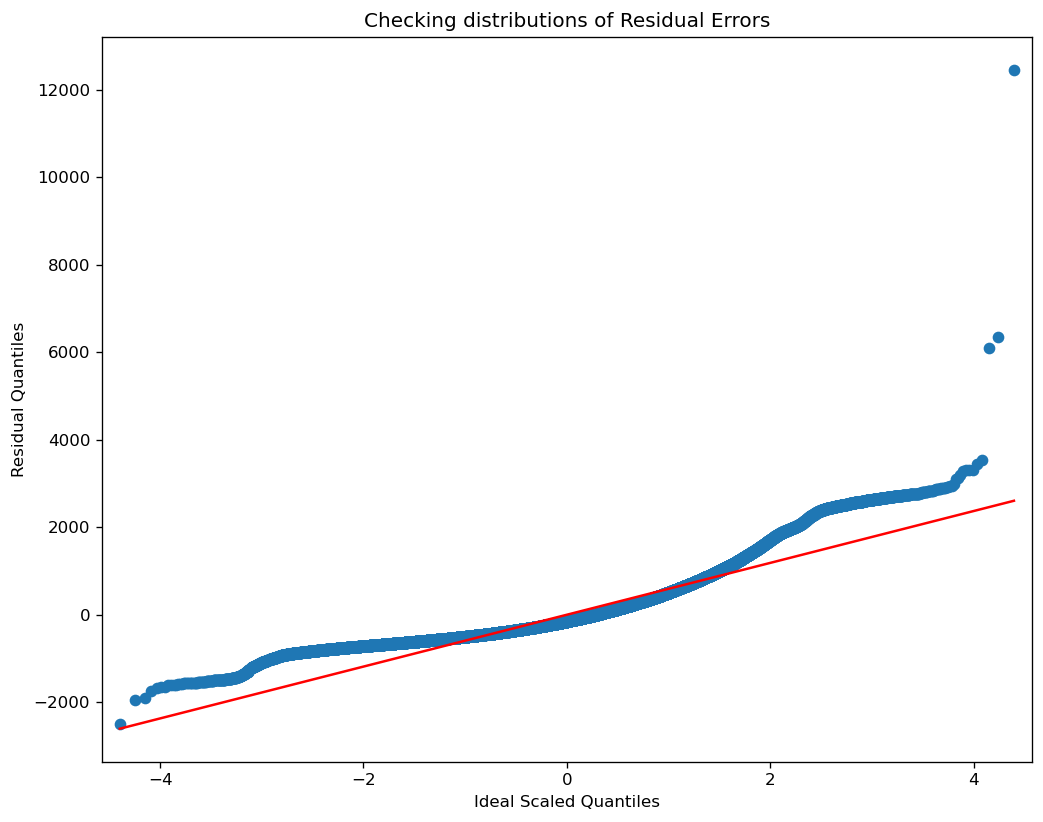

In [30]:
# Importing qq plot and checking for linear relationship of our data.

from statsmodels.graphics.gofplots import qqplot

fig , ax = plt.subplots(figsize = (10,8) , dpi = 120)
qqplot(residuals.residuals , line ='s' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.title('Checking distributions of Residual Errors')

In [31]:
# Yeah most of our data is linear. There are very few outliers.

In [32]:
# Now lets check for multicollinearity using Variance Inflation Factor(VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column(it works only for non categorical)
VIF = pd.Series([variance_inflation_factor(df.values , i) for i in range(df.shape[1])] , index = df.columns)
VIF

vendor_id               1.096377e+00
passenger_count         1.090525e+00
pickup_longitude        2.650694e+00
pickup_latitude         1.335037e+00
dropoff_longitude       2.618452e+00
dropoff_latitude        1.330424e+00
trip_duration           1.103229e+00
weekday                 1.010263e+00
hour_of_day             1.010530e+00
month                   1.004018e+00
store_and_fwd_flag_N    3.898855e+06
store_and_fwd_flag_Y    2.170571e+04
dtype: float64

From this list , we can clearly see that their is no independent variable that has its value over 5,
which means that there are no features that exhibit Multicollinearity in the dataset.

In [34]:
# now lets normalize the data and then interpret its output.

lr = LinearRegression(normalize = True)
# fitting the model
lr.fit(train_x , train_y)

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [35]:
test_pred = lr.predict(test_x)
k = np.sqrt(mse(test_pred , test_y))
print('RMSE after normalizing the data' , k)

RMSE after normalizing the data 592.0999304651102


Let us remove the coffecients that are very small close to zero and again plot the model.

In [38]:
# separating independent and dependent variables
x = df.drop(['trip_duration'] , axis = 1)
y = df['trip_duration']
x.shape , y.shape

((729287, 11), (729287,))

In [39]:
# Arranging coffecients with features

Coffecients = pd.DataFrame({
    'Variable' : x.columns,
    'coffecients': lr.coef_
})
Coffecients.head()

,Variable,coffecients
0,vendor_id,6.548839
1,passenger_count,8.616035
2,pickup_longitude,141.958899
3,pickup_latitude,-81.825674
4,dropoff_longitude,-35.253750


Filtering our data with coffecients that have their value close to zero.

In [41]:
sig_var = Coffecients[(Coffecients.coffecients > 1) | (Coffecients.coffecients < -1)]

In [42]:
subset = df[sig_var['Variable'].values]
subset.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,2,6,2,1,0


In [43]:
subset.shape , y.shape

((729287, 11), (729287,))

In [44]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(subset , y , random_state = 100)

In [45]:
lr = LinearRegression(normalize = True)
lr.fit(train_x , train_y)

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [46]:
test_pred = lr.predict(test_x)
k = np.sqrt(mse(test_pred , test_y))
print('RMSE of our current model is :' , k)

RMSE of our current model is : 592.1103056912731
